In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

# in the statistics, we regard the distribution of samples as the probability distribution of the event.
# we call the probabilities which are distributed to the discrete options as multinomial distribution

# to implement the action of rolling dice, we send a distribution vector into the multinomial function, and it will return a vector which has the same length with the vector we put in. The value of the number appears in the index i is the number of i appears in the sampling process
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [2]:
# sampling 10 samples from the set
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 0., 2., 4., 1., 1.])

In [3]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1540, 0.1540, 0.1700, 0.1830, 0.1600, 0.1790])

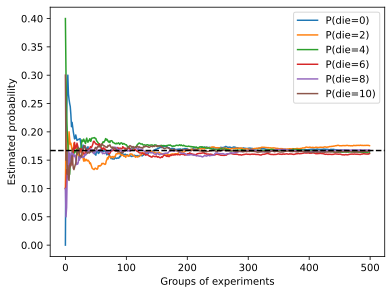

In [4]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))  # we carry on 500 groups of experiments, and extract 10 samples from each group
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + i) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();